In [165]:
#Import Required Libraries

In [166]:
import numpy as np 
import pandas as pd

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
df=pd.read_csv('student_scores.csv') #Load CSV File

In [200]:
df.shape

(25, 2)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [201]:
df.head(10) 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [171]:
df.describe()  #statistical Information

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [202]:
#Plotting the Distribution of scores

Text(0.5, 1.0, 'Hours vs Scores')

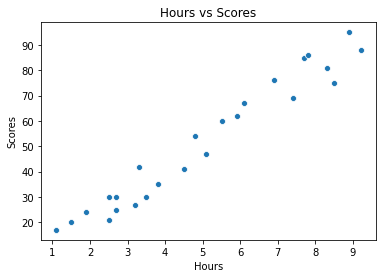

In [203]:
sns.scatterplot(x='Hours', y='Scores', data=df) #Visualizing A ScatterPlot using Seaborn
plt.title('Hours vs Scores')

In [204]:
#Preparing Data
X = df['Hours']
y=df['Scores']

In [175]:
#Importing Train_test_split
from sklearn.model_selection import train_test_split  

In [176]:
#Splitting the data using sci-kitlearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [177]:
#Training the Algorithm

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
model=LinearRegression()

In [190]:
#Fitting the X and y
model.fit(X_train, y_train)

LinearRegression()

In [191]:
print(model.intercept_)

3.480969390558897


In [192]:
print(model.coef_)

[9.6566467]


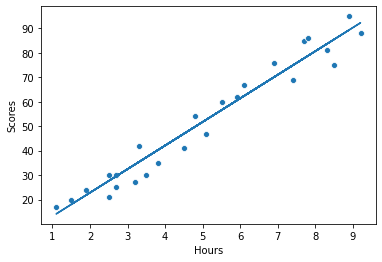

In [205]:
#plotting the Regression Line
line = model.coef_*X+model.intercept_

# Plotting for the test data
sns.scatterplot(X, y)
plt.plot(X, line);

In [194]:
#Making Predictions
predictions=model.predict(X_test)

In [195]:
predictions

array([49.83287355, 74.94015497, 37.27923284, 78.80281365, 21.82859812,
       27.62258614, 17.96593944, 52.72986756])

In [211]:
#we can also predict our own data
#If Hours =9.25
hour=9.25
test=np.array([hour])
test=test.reshape(-1,1)
preds=model.predict(test)
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(preds[0]))

#If the student studies for 9.25 hours per day Our model predicts that the student will score will be 92.8

No of Hours = 9.25
Predicted Score = 92.80495136560971


In [212]:
#If Hours =8
hour=8
test=np.array([hour])
test=test.reshape(-1,1)
preds=model.predict(test)
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(preds[0]))
#If the student studies for 8hours per day Our model predicts that the student will score will be 80.7

No of Hours = 8
Predicted Score = 80.73414299060285


In [209]:
#Comparing Our Actuall data vs Prediction
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
0,54,49.832874
1,69,74.940155
2,30,37.279233
3,86,78.802814
4,24,21.828598
5,21,27.622586
6,20,17.965939
7,47,52.729868


In [210]:
#Evaluating the Model

from sklearn import metrics  
print('Mean Squared error:', 
      metrics.mean_squared_error(y_test,predictions))
print('root mean squared error:',
      np.sqrt(metrics.mean_squared_error(y_test,(predictions))))
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predictions)) 

Mean Squared error: 30.372440493509032
root mean squared error: 5.511119713226073
Mean Absolute Error: 5.142702093751716
